## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('priv_data_clean.csv')
df.head()

Location        Country Aircraft.damage              Make     Model  \
0       ID  United States       Destroyed           Stinson     108-3   
1       CA  United States       Destroyed             Piper  Pa24-180   
2       VA  United States       Destroyed            Cessna      172M   
3       CA  United States       Destroyed          Rockwell       112   
4       MA  United States     Substantial  Mcdonnel Douglas       Dc9   

   Number.of.Engines    Engine.Type Purpose.of.flight  Total.Fatal.Injuries  \
0                1.0  Reciprocating          Personal                   2.0   
1                1.0  Reciprocating          Personal                   4.0   
2                1.0  Reciprocating          Personal                   3.0   
3                1.0  Reciprocating          Personal                   2.0   
4                2.0      Turbo Fan           Unknown                   0.0   

   Total.Serious.Injuries  ...                       Weather.Condition  \
0                     0.0  ...                                 Unknown   
1                     0.0  ...                                 Unknown   
2                     0.0  ...  Instrumental Meteorological Conditions   
3                     0.0  ...  Instrumental Meteorological Conditions   
4                     0.0  ...        Visual Meteorological Conditions   

   Total.Passengers Total.Injured  Percent.Injured  Percent.Uninjured  \
0               2.0           2.0       100.000000           0.000000   
1               4.0           4.0       100.000000           0.000000   
2               3.0           3.0       100.000000           0.000000   
3               2.0           2.0       100.000000           0.000000   
4              45.0           1.0         2.222222          97.777778   

   Percent.Died  Airplane.Type  Event.Day Event.Month  Event.Year  
0         100.0        Private         24          10        1948  
1         100.0        Private         19           7        1962  
2         100.0        Private         30           8        1974  
3         100.0        Private         19           6        1977  
4           0.0        Private         17           9        1979  

[5 rows x 22 columns]

## Visualize KPIs

In [4]:
fig, ax = plt.subplots(2,2, figsize = ((15,8)))


df['Aircraft.damage'].value_counts().plot.bar(ax=ax[0,0]);
ax[0, 0].set_title("Aircraft Damage")
ax[0, 0].set_xlabel("")

df['Total.Injured'].plot.hist(ax=ax[0,1], range=[0,30])
ax[0, 1].set_title("Total Injured")
ax[0, 1].set_xlabel("")

df['Percent.Injured'].plot.hist(ax=ax[1,0])
ax[1, 0].set_title("Percent Injured")
ax[1, 0].set_xlabel("")

df['Percent.Died'].plot.hist(ax=ax[1,1]);
ax[1, 1].set_title("Percent Died")
ax[1, 1].set_xlabel("")

plt.tight_layout()
sns.despine()

In [5]:
#popular_makes = df['Make'].value_counts()
#popular_makes = list(popular_makes[popular_makes > 100].index)
popular_makes = list(df['Make'].value_counts().index)

print(f"top makes: {popular_makes}")

top makes: ['Cessna', 'Piper', 'Beech', 'Bell', 'Boeing', 'Mooney', 'Grumman', 'Bellanca', 'Hughes', 'Air Tractor', 'Aeronca', 'Schweizer', 'Maule', 'Mcdonnel Douglas', 'Champion', 'Stinson', 'Cirrus', 'Luscombe', 'Aero Commander', 'Taylorcraft', 'De Havilland', 'North American', 'Aerospatiale', 'Hiller', 'Rockwell', 'Airbus', 'Enstrom', 'Grumman American', 'Ayres', 'Embraer', 'Sikorsky', 'Swearingen', 'Ercoupe Eng & Research Corp', 'Lake', 'Fairchild', 'Waco', 'Mitsubishi', 'Aviat', 'Bombardier', 'GrummanSchweizer', 'Socata', 'Ryan', 'Helio', 'Learjet', 'Schleicher', 'Dehavilland', 'Globe', 'Weatherly', 'Wsk Pzl Mielec', 'Lockheed']


## Damage Index

In [6]:
unk_indices = list(df.loc[df['Aircraft.damage'] == 'Unknown'].index)

damage_probs = df['Aircraft.damage'].value_counts()
damage_probs = damage_probs.drop('Unknown')
damage_probs = damage_probs / damage_probs.sum()
rand_damage = np.random.choice(list(damage_probs.index), size = len(unk_indices), p = list(damage_probs))

adj_df = df.copy()
adj_df['Aircraft.damage'].iloc[unk_indices] = rand_damage
pop_means_df = adj_df.groupby('Make').mean(numeric_only=True)

di_df = pd.DataFrame(columns = ['Damage_Index', 'Make_Num_Incidents', 'Uninjured_P', 'Injured_P', 'Died_P'], )

for make in popular_makes:
    make_info = adj_df[adj_df['Make'] == make]['Aircraft.damage'].value_counts(normalize=True)

    if 'Minor' not in make_info.index:
        make_info['Minor'] = 0

    damage_index = (make_info['Destroyed'] * 4) + (make_info['Substantial'] * 2) + (make_info['Minor'] * 1)

    num_incidents = adj_df['Make'].value_counts()[make]

    make_stats = list(pop_means_df.loc[make].reindex(['Percent.Uninjured', 'Percent.Injured', 'Percent.Died']))

    di_df.loc[make] =[damage_index, num_incidents] + make_stats

In [7]:
threshold = 1000
penalty_rate = 0.5
di_df['Penalty'] = di_df['Make_Num_Incidents'].apply(lambda x: 1 + penalty_rate * np.log(threshold/x) if x < threshold else 1)
di_df['Adj_Damage_Index'] = di_df['Damage_Index'] * di_df['Penalty'] 
di_df.sort_values(by = 'Adj_Damage_Index')

Damage_Index  Make_Num_Incidents  Uninjured_P  \
Boeing                           2.083828              1348.0    77.379048   
Cessna                           2.358147             26101.0    64.282062   
Piper                            2.439002             14353.0    58.750565   
Bellanca                         2.440430              1024.0    55.102539   
Bell                             2.474534              2415.0    52.612850   
Grumman                          2.498695              1149.0    66.232287   
Air Tractor                      2.348028               862.0    59.416087   
Hughes                           2.378959               884.0    57.882730   
Mooney                           2.534003              1294.0    48.377125   
Beech                            2.547563              5088.0    54.217529   
Maule                            2.191304               575.0    76.188406   
Aeronca                          2.280952               630.0    58.134921   
Mcdonnel Douglas                 2.168519               540.0    73.004829   
Schweizer                        2.287931               580.0    64.454023   
Champion                         2.307385               501.0    59.381238   
Stinson                          2.263761               436.0    64.908257   
Airbus                           2.037975               316.0    70.359984   
Luscombe                         2.240786               407.0    62.203112   
Taylorcraft                      2.247340               376.0    51.241135   
Cirrus                           2.377129               411.0    50.048662   
De Havilland                     2.316354               373.0    67.259694   
Hiller                           2.339233               339.0    62.881023   
Enstrom                          2.274306               288.0    68.026620   
Aerospatiale                     2.537190               363.0    53.723016   
North American                   2.558266               369.0    53.048780   
Aero Commander                   2.636816               402.0    50.899668   
Embraer                          2.128866               194.0    77.153504   
Bombardier                       1.948148               135.0    84.815479   
Rockwell                         2.615385               338.0    56.928008   
Swearingen                       2.156250               160.0    79.431314   
Waco                             2.121429               140.0    72.619048   
Aviat                            2.152174               138.0    68.236715   
Dehavilland                      2.040000               100.0    69.416667   
Fairchild                        2.232394               142.0    68.702885   
Ayres                            2.552036               221.0    60.859729   
Grumman American                 2.657658               222.0    44.256757   
Helio                            2.231481               108.0    83.010662   
Lake                             2.387324               142.0    56.220657   
Sikorsky                         2.517857               168.0    51.603364   
Schleicher                       2.267327               101.0    48.514851   
Ercoupe Eng & Research Corp      2.531646               158.0    52.531646   
Globe                            2.308511                94.0    54.432624   
Ryan                             2.418182               110.0    45.606061   
GrummanSchweizer                 2.519685               127.0    67.716535   
Socata                           2.504505               111.0    45.720721   
Weatherly                        2.404494                89.0    65.168539   
Mitsubishi                       2.789855               138.0    51.455314   
Learjet                          2.634615               104.0    64.342949   
Wsk Pzl Mielec                   2.590909                88.0    52.840909   
Lockheed                         3.074074                27.0    38.888889   

                             Injured_P     Died_P 

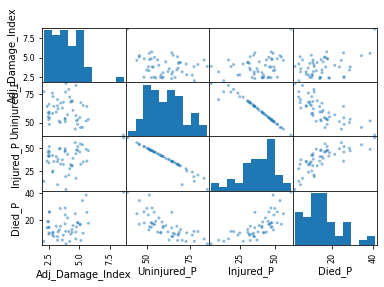

In [8]:
pd.plotting.scatter_matrix(di_df[['Adj_Damage_Index', 'Uninjured_P', 'Injured_P', 'Died_P']]);

In [9]:
di_df = di_df.sort_values(by = 'Adj_Damage_Index')
di_df

Damage_Index  Make_Num_Incidents  Uninjured_P  \
Boeing                           2.083828              1348.0    77.379048   
Cessna                           2.358147             26101.0    64.282062   
Piper                            2.439002             14353.0    58.750565   
Bellanca                         2.440430              1024.0    55.102539   
Bell                             2.474534              2415.0    52.612850   
Grumman                          2.498695              1149.0    66.232287   
Air Tractor                      2.348028               862.0    59.416087   
Hughes                           2.378959               884.0    57.882730   
Mooney                           2.534003              1294.0    48.377125   
Beech                            2.547563              5088.0    54.217529   
Maule                            2.191304               575.0    76.188406   
Aeronca                          2.280952               630.0    58.134921   
Mcdonnel Douglas                 2.168519               540.0    73.004829   
Schweizer                        2.287931               580.0    64.454023   
Champion                         2.307385               501.0    59.381238   
Stinson                          2.263761               436.0    64.908257   
Airbus                           2.037975               316.0    70.359984   
Luscombe                         2.240786               407.0    62.203112   
Taylorcraft                      2.247340               376.0    51.241135   
Cirrus                           2.377129               411.0    50.048662   
De Havilland                     2.316354               373.0    67.259694   
Hiller                           2.339233               339.0    62.881023   
Enstrom                          2.274306               288.0    68.026620   
Aerospatiale                     2.537190               363.0    53.723016   
North American                   2.558266               369.0    53.048780   
Aero Commander                   2.636816               402.0    50.899668   
Embraer                          2.128866               194.0    77.153504   
Bombardier                       1.948148               135.0    84.815479   
Rockwell                         2.615385               338.0    56.928008   
Swearingen                       2.156250               160.0    79.431314   
Waco                             2.121429               140.0    72.619048   
Aviat                            2.152174               138.0    68.236715   
Dehavilland                      2.040000               100.0    69.416667   
Fairchild                        2.232394               142.0    68.702885   
Ayres                            2.552036               221.0    60.859729   
Grumman American                 2.657658               222.0    44.256757   
Helio                            2.231481               108.0    83.010662   
Lake                             2.387324               142.0    56.220657   
Sikorsky                         2.517857               168.0    51.603364   
Schleicher                       2.267327               101.0    48.514851   
Ercoupe Eng & Research Corp      2.531646               158.0    52.531646   
Globe                            2.308511                94.0    54.432624   
Ryan                             2.418182               110.0    45.606061   
GrummanSchweizer                 2.519685               127.0    67.716535   
Socata                           2.504505               111.0    45.720721   
Weatherly                        2.404494                89.0    65.168539   
Mitsubishi                       2.789855               138.0    51.455314   
Learjet                          2.634615               104.0    64.342949   
Wsk Pzl Mielec                   2.590909                88.0    52.840909   
Lockheed                         3.074074                27.0    38.888889   

                             Injured_P     Died_P 

In [10]:
best_dest = df.loc[(df['Aircraft.damage'] == 'Destroyed') & (df['Percent.Died'] == 0) & (df['Event.Year'] > 1989) & (df['Percent.Injured'] == 0) & (df['Total.Passengers'] != 0)]
best_subs = df.loc[(df['Aircraft.damage'] == 'Substantial') & (df['Percent.Died'] == 0) & (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]
best_minor = df.loc[(df['Aircraft.damage'] == 'Minor') & (df['Percent.Died'] == 0) & (df['Percent.Injured'] == 0) & (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]

In [11]:
d_d = best_dest['Model'].value_counts().to_dict()
d_s = best_subs['Model'].value_counts().to_dict()
d_m = best_minor['Model'].value_counts().to_dict()
all_keys = set()
all_keys.update(d_d.keys())
all_keys.update(d_s.keys())
all_keys.update(d_m.keys())
r_d  = {}
for key in all_keys:
    r_d[key] = d_d.get(key, 0) + d_s.get(key, 0) + d_m.get(key, 0)
result_d = {}
for key in all_keys:
    denominator = df['Model'].value_counts().to_dict().get(key, 1)
       
    if denominator != 0:
        result_d[key] = r_d[key] / denominator
    else:
        result_d[key] = 0 

In [12]:
model_performance = pd.Series(result_d)

model_performance

Oh-13E       0.500000
Dw-1         1.000000
F4-622R      1.000000
As350-B2     1.000000
182          0.582923
               ...   
Pa-28-201    1.000000
Dhc-1        0.500000
J5-C         1.000000
T 6G         1.000000
182Btw       1.000000
Length: 3121, dtype: float64

In [13]:
model_vc = df['Model'].value_counts()

In [14]:
model_performance.isna().sum()

0

In [16]:
model_pwdc = pd.concat({'Performance':model_performance, 'Amount of incidents Model':model_vc}, axis=1)
model_pwdc.sort_values(by='Amount of incidents Model',ascending=False)

Performance  Amount of incidents Model
152           0.468723                       2334
172           0.593128                       1659
172N          0.561788                       1141
Pa-28-140     0.473106                        911
150           0.463263                        803
...                ...                        ...
Pa-30-39      1.000000                          1
Emb-545       1.000000                          1
280Cb         1.000000                          1
Pa22-135      1.000000                          1
21                 NaN                          1

[4737 rows x 2 columns]

In [17]:
model_pwdc = model_pwdc.fillna(0)
model_pwdc.sort_values(by='Performance')

Performance  Amount of incidents Model
21                  0.0                          1
500C/369Hs          0.0                          1
A24-R               0.0                          1
Dc-10-30            0.0                          1
Be-55-D55           0.0                          1
...                 ...                        ...
Dhc-22A             1.0                          1
Pa -28-181          1.0                          1
11Ac-991            1.0                          1
152K                1.0                          1
Bh47G               1.0                          1

[4737 rows x 2 columns]

In [ ]:
joint = df.join(model_pwdc, how='outer',on='Model')
joint2 = joint.join(di_df, how='outer', on='Make')

In [32]:
joint3 = joint2.loc[joint2['Amount of incidents Model'] >= 20]joint3['Damage.index.top3'] = joint3['Make'].apply(lambda x: x in ['Boeing', 'Cessna', 'Piper'])
joint3['Damage.index.top3'] = joint3['Make'].apply(lambda x: x in ['Boeing', 'Cessna', 'Piper'])

In [40]:
joint4 = joint3.loc[(joint3['Make'] == 'Boeing') | (joint3['Make'] == 'Cessna') | (joint3['Make'] == 'Piper')]
joint4.groupby('Make').mean()

Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
Make                                                                      
Boeing           1.534884              0.848837                0.466777   
Cessna           1.073868              0.299588                0.173251   
Piper            1.132892              0.414676                0.209821   

        Total.Minor.Injuries  Total.Uninjured  Total.Passengers  \
Make                                                              
Boeing              0.491694        51.978405         53.785714   
Cessna              0.251399         1.270412          1.994650   
Piper               0.260266         1.192638          2.077402   

        Total.Injured  Percent.Injured  Percent.Uninjured  Percent.Died  ...  \
Make                                                                     ...   
Boeing       1.807309        15.919180          74.280156      3.579680  ...   
Cessna       0.724239        35.451624          64.437265     13.882692  ...   
Piper        0.884764        41.228144          58.700917     18.302823  ...   

        Performance  Amount of incidents Model  Damage_Index  \
Make                                                           
Boeing     0.457614                  70.533223      2.083828   
Cessna     0.537089                 614.962181      2.358147   
Piper      0.496230                 314.618271      2.439002   

        Make_Num_Incidents  Uninjured_P  Injured_P     Died_P  Penalty  \
Make                                                                     
Boeing              1348.0    77.379048  13.644691   4.119794      1.0   
Cessna             26101.0    64.282062  35.599169  14.184457      1.0   
Piper              14353.0    58.750565  41.165828  18.580916      1.0   

        Adj_Damage_Index  Damage.index.top3  
Make                                         
Boeing          2.083828               True  
Cessna          2.358147               True  
Piper           2.439002               True  

[3 rows x 23 columns]

In [33]:
joint3['Damage.index.top3'] = joint3['Make'].apply(lambda x: x in ['Boeing', 'Cessna', 'Piper'])
#joint3['Damage.index.top3'] = pd.Series(['Yes' if x in ['Boeing', 'Cessna', 'Piper'] else 'No' for x in joint3['Make']]])


Location                     0
Country                      0
Aircraft.damage              0
Make                         0
Model                        0
Number.of.Engines            0
Engine.Type                  0
Purpose.of.flight            0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Total.Passengers             0
Total.Injured                0
Percent.Injured              0
Percent.Uninjured            0
Percent.Died                 0
Airplane.Type                0
Event.Day                    0
Event.Month                  0
Event.Year                   0
Performance                  0
Amount of incidents Model    0
Damage_Index                 0
Make_Num_Incidents           0
Uninjured_P                  0
Injured_P                    0
Died_P                       0
Penalty                      0
Adj_Damage_Index             0
Damage.index.top3            0
dtype: i

In [35]:
joint3['Damage.index.top3'].value_counts()

True     37589
False    15100
Name: Damage.index.top3, dtype: int64

In [41]:
joint4['Model'].value_counts()

152          2334
172          1659
172N         1141
Pa-28-140     911
150           803
             ... 
369E            2
Dc-9-82         2
Dhc-6-300       1
Md-82           1
Md-88           1
Name: Model, Length: 297, dtype: int64

In [44]:
joint4.sort_values(by='Performance', ascending=False).groupby('Model').mean()[:5]

Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
Model                                                                    
120             1.000000              0.119497                0.138365   
140             1.002513              0.108040                0.143216   
140A            1.000000              0.135135                0.054054   
150             1.002491              0.132005                0.140722   
150B            1.000000              0.238095                0.095238   

       Total.Minor.Injuries  Total.Uninjured  Total.Passengers  Total.Injured  \
Model                                                                           
120                0.176101         1.006289          1.440252       0.433962   
140                0.180905         1.037688          1.469849       0.432161   
140A               0.216216         1.162162          1.567568       0.405405   
150                0.254047         0.936488          1.463263       0.526775   
150B               0.238095         1.000000          1.571429       0.571429   

       Percent.Injured  Percent.Uninjured  Percent.Died  ...  Performance  \
Model                                                    ...                
120          28.616352          71.383648      6.918239  ...     0.644172   
140          28.266332          71.733668      6.281407  ...     0.644110   
140A         25.675676          74.324324      8.108108  ...     0.567568   
150          35.548242          64.327225      8.420803  ...     0.463263   
150B         33.333333          66.666667     14.285714  ...     0.476190   

       Amount of incidents Model  Damage_Index  Make_Num_Incidents  \
Model                                                                
120                        163.0      2.358147             26101.0   
140                        399.0      2.358147             26101.0   
140A                        37.0      2.358147             26101.0   
150                        803.0      2.358147             26101.0   
150B                        21.0      2.358147             26101.0   

       Uninjured_P  Injured_P     Died_P  Penalty  Adj_Damage_Index  \
Model                                                                 
120      64.282062  35.599169  14.184457      1.0          2.358147   
140      64.282062  35.599169  14.184457      1.0          2.358147   
140A     64.282062  35.599169  14.184457      1.0          2.358147   
150      64.282062  35.599169  14.184457      1.0          2.358147   
150B     64.282062  35.599169  14.184457      1.0          2.358147   

       Damage.index.top3  
Model                     
120                 True  
140                 True  
140A                True  
150                 True  
150B                True  

[5 rows x 23 columns]